In [5]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import StrMethodFormatter
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar

In [6]:
def import_map(folder):
    df = gpd.read_file('Georgia_counties')
    df.sort_values(by=['NAME10'], inplace=True)
    df = df.to_crs('epsg:4326')
    return df

In [7]:
def import_data(filename):
    df = pd.read_excel(filename)
    df['county'] = df.County.str.extract(r'(^\w+.\w+)')
    df = df.groupby('county').sum().reset_index()
    return df

In [8]:
def add_geometry(df_geometery,geo_county_col,df,data_county_col):
    df = df_geometery.merge(df, left_on=geo_county_col, right_on=data_county_col, how = 'right')
    df = df.set_geometry('geometry')
    return df

In [30]:
def create_species_groups(df):
    df['groups'] = np.where((df.Incognita > 0)&(df.Arenaria == 0)&(df.Javanica == 0), '$M. incognita$',
                   np.where((df.Incognita == 0)&(df.Arenaria > 0)&(df.Javanica == 0), '$M. arenaria$',
                   np.where((df.Incognita == 0)&(df.Arenaria == 0)&(df.Javanica > 0), '$M. javanica$',

                   np.where((df.Incognita > 0)&(df.Arenaria > 0)&(df.Javanica == 0), '$M. incognita$ & $M. arenaria$',
                   np.where((df.Incognita > 0)&(df.Arenaria == 0)&(df.Javanica > 0), '$M. incognita$ & $M. javanica$',
                   np.where((df.Incognita == 0)&(df.Arenaria > 0)&(df.Javanica > 0), '$M. arenaria$ & $M. javanica$',
                            
                   np.where((df.Incognita > 0)&(df.Arenaria > 0)&(df.Javanica > 0), '$M. incognita$ , $M. arenaria$ & $M. javanica$',
                    'none')))))))
    return df

In [39]:
def species_map(df_counties,df,species,color):
    df_concat[species].fillna(0, inplace=True)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0)
    base = df_counties.plot(ax=ax, edgecolor='black',facecolor='white')
    plot = df.plot(column=species, 
            ax=ax,
            edgecolor='black',
            legend=True,
#             categorical=True,
#             legend_kwds={'bbox_to_anchor':(1.1, .95),'fontsize':20,'frameon':False},
            legend_kwds={'label': "Number of infested fields",'orientation': "horizontal"},
            cax=cax,
            cmap=color);
#     leg = plot.get_legend()
#     for l in leg.get_texts():
#         new_text = f'{float(l.get_text()):,.0f}'
#         l.set_text(new_text)
    ax.set_axis_off()
    ax.set_title(f'Number of fields infested with $M. {species.lower()}$', fontsize=20, pad=10);
    fig.savefig(f'{species}.jpg',dpi=1080)
    return fig

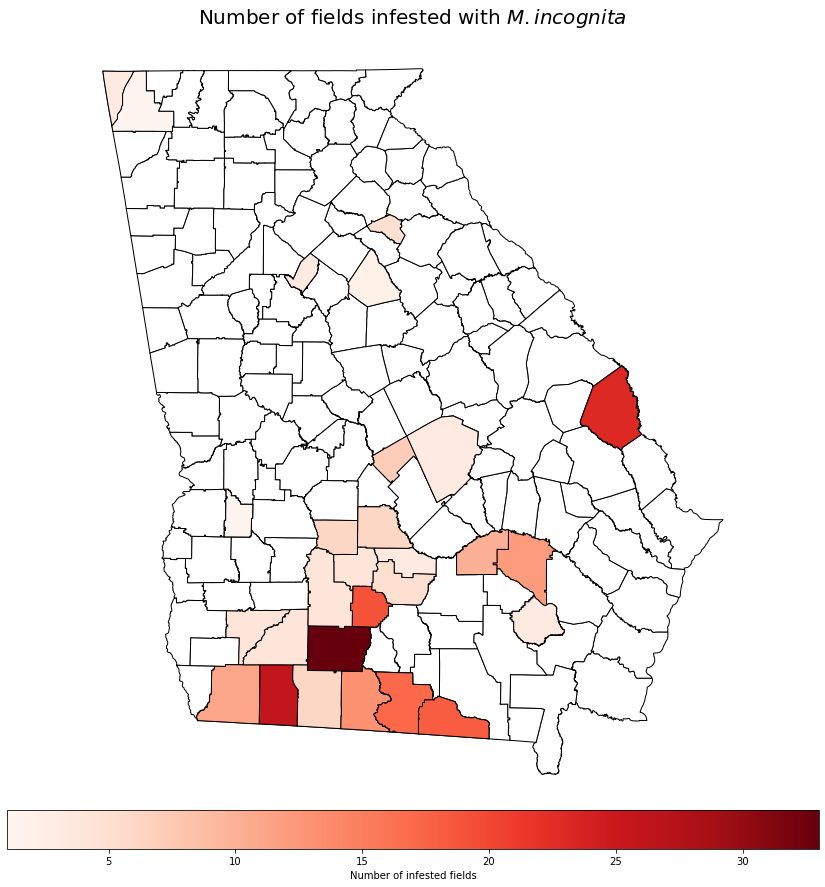

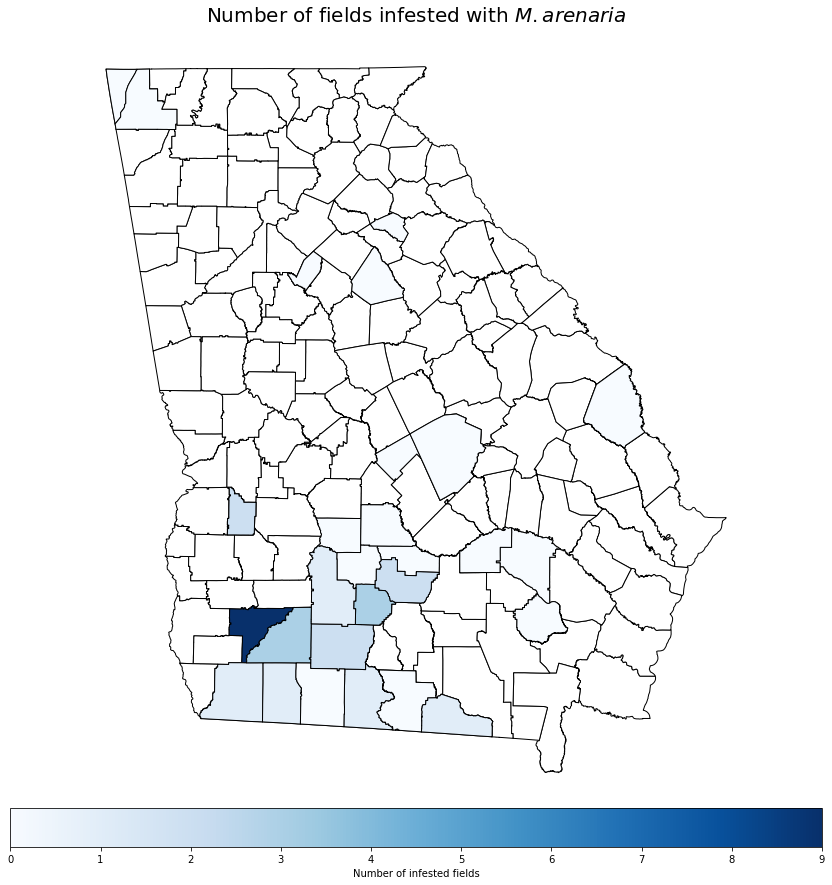

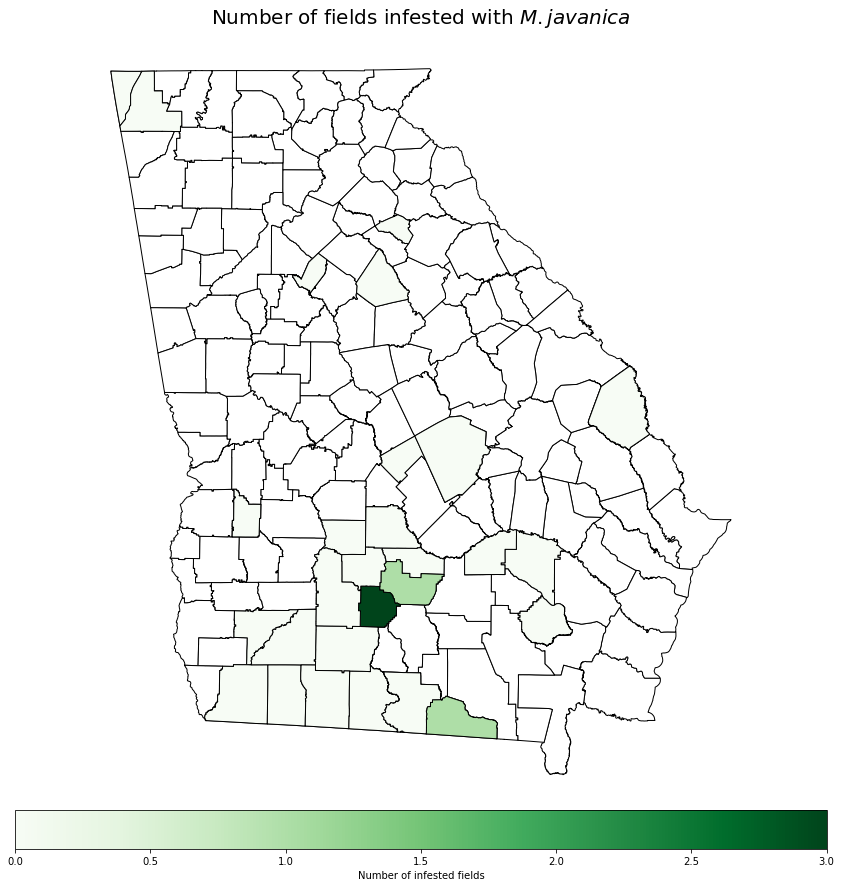

In [40]:
df_counties = import_map('Georgia_counties')
df = import_data('FOR_CHART.xlsx')
df_concat = add_geometry(df_counties,'NAME10',df,'county')
species = ['Incognita','Arenaria','Javanica']
color = ['Reds','Blues','Greens']
for s,c in zip(species,color):
    species_map(df_counties,df_concat,s,c)

In [35]:
def group_map(df_counties,df):
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_aspect('equal')
    base = df_counties.plot(ax=ax, edgecolor='black',facecolor='white')
    plot = df.plot(column='groups', 
            ax=ax,
            edgecolor='black',
            legend=True,
            categorical=True,
            legend_kwds={'bbox_to_anchor':(1.25, .95),'fontsize':20,'frameon':False},
            cmap='tab20b');
    ax.set_axis_off()
    ax.set_title('Distribution of species groups among counties', fontsize=20, pad=10);
    fig.savefig('species_group.jpg',dpi=1080)
    return fig

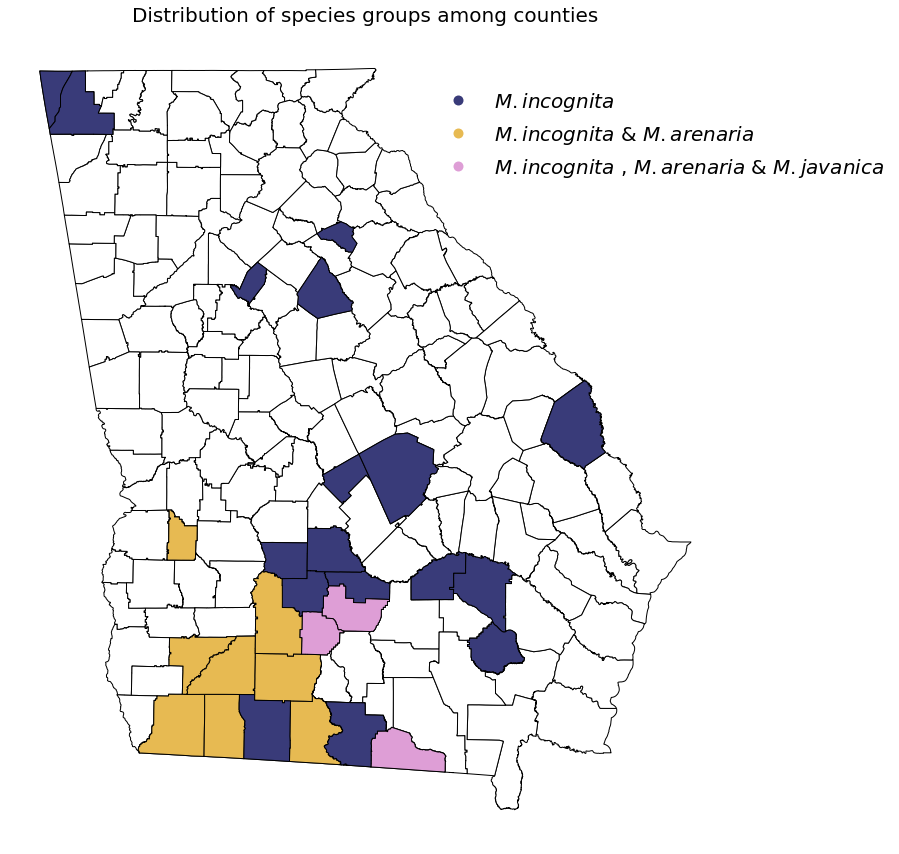

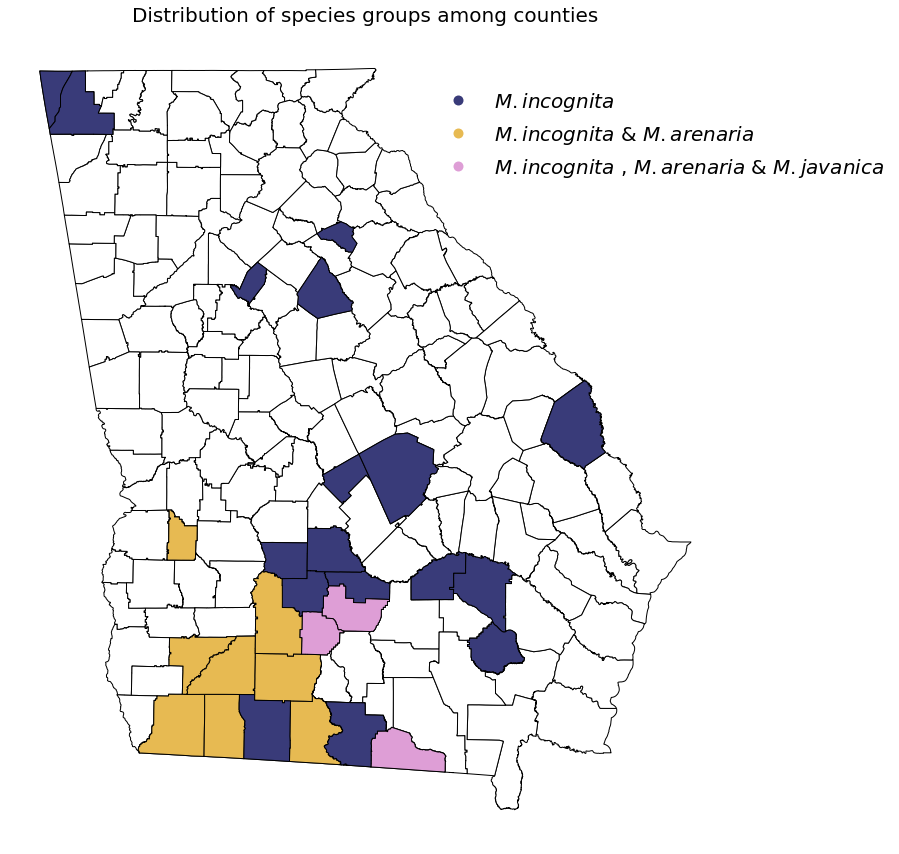

In [36]:
df_counties = import_map('Georgia_counties')
df = import_data('FOR_CHART.xlsx')
df_concat = add_geometry(df_counties,'NAME10',df,'county')
df_concat = create_species_groups(df_concat)
group_map(df_counties,df_concat)

In [14]:
def findna(df,column):
    df.loc[df[column].isnull(),'value_is_NaN'] = 'Yes'
    df.loc[df[column].notnull(), 'value_is_NaN'] = 'No'
    return df.loc[df.value_is_NaN == 'Yes']

In [15]:
findna(df_concat,'Incognita')

,OBJECTID,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,totpop10,WFD,RDC_AAA,MNGWPD,...,Not_identified,Mi,Ma,Mj,MiMa,MiMj,MaMj,MiMaMj,groups,value_is_NaN


In [16]:
color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
         'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
         'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
         'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis',
         'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
         'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 
         'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring',
         'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
         'viridis', 'viridis_r', 'winter', 'winter_r']
#https://matplotlib.org/2.0.2/users/colormaps.html

<AxesSubplot:>

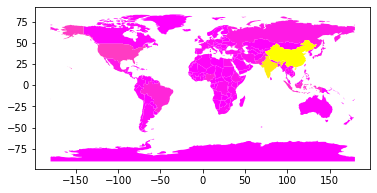

In [27]:
gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(column='pop_est', cmap= 'spring')